# INVESTIGATE DATASET PROJECT - DAND
---
**Aim of the Project to follow 5 processes of data analysis**
+ Questions
+ Wrangle
+ Perform EDA
+ Draw conclusions
+ Communicate the results

The data used in this project are 
**tmdb-movies Dataset** contains information about 10,866 and 21 columns, movies collected from The Movie (TMDb),including user ratings and revenue.I'll ask questions related to genres and popularity.

# Questions
---
### Based on data we could find these questions:
+ What are popular genres 
+ Is Long movies have more Popularity 
+ Is the Popularity and Rating of movies getting better, worse or staying same over time?

# Wrangel 
---
###  Wrangle is the second process in *DA* that including:
> **Three steps:**
+ **Gathering data** *we gatherd the data from csv file*
+ **Access data** *identify any problems in your data’s quality or structure*
+ **Cleaning data** *modifying, replacing, or removing data*

# Perform EDA
+ Exploring involves finding patterns in your data, visualizing relationships in your data, and building intuition about what you’re working with

# Draw conclusions
+ This step is typically approached with machine learning or inferential but in this project, I will focus on drawing conclusions with descriptive statistics.

# Communicate 
+ This last step that conveys meaning in the insights so I'll use Data visualization will always be very valuable.

In [62]:
# Initialize libraries

%matplotlib inline
import pandas as pd #dealing with data.
import numpy as np #dealing with any calculations in data.

# for efficient visualizations import matplotlib and seaborn!.
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [63]:
# Load data
df = pd.read_csv('tmdb-movies.csv') 
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [64]:
df.shape

(10866, 21)

In [65]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [66]:
# drop not necessary columns from dataset
df.drop(['id','budget_adj','revenue_adj','cast', 'homepage', 'tagline', 'keywords', 'overview', 'imdb_id'], axis=1, inplace=True)

In [67]:
# Display Columns
for i ,v in enumerate(df.columns):
    print(i,v)

0 popularity
1 budget
2 revenue
3 original_title
4 director
5 runtime
6 genres
7 production_companies
8 release_date
9 vote_count
10 vote_average
11 release_year


In [68]:
# After drop
df.head(1)

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015


In [69]:
# Check structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   director              10822 non-null  object 
 5   runtime               10866 non-null  int64  
 6   genres                10843 non-null  object 
 7   production_companies  9836 non-null   object 
 8   release_date          10866 non-null  object 
 9   vote_count            10866 non-null  int64  
 10  vote_average          10866 non-null  float64
 11  release_year          10866 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 1018.8+ KB


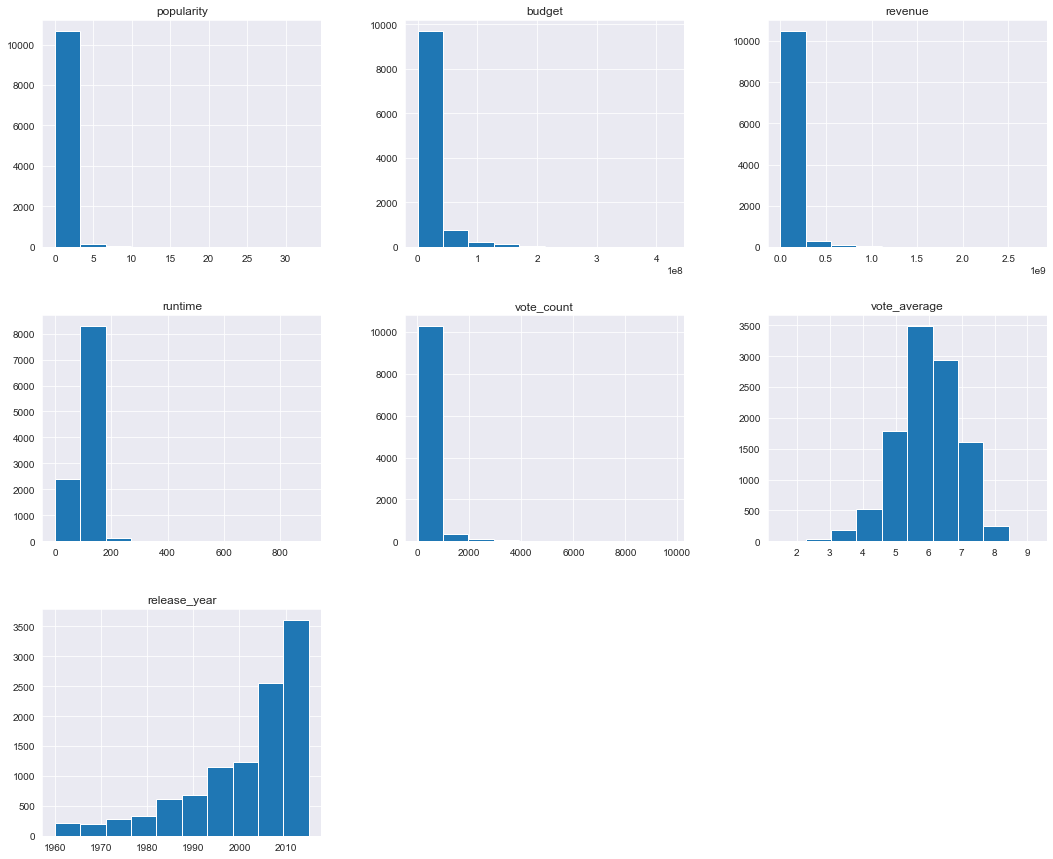

In [70]:
df.hist(figsize=(18,15));

In [71]:
#check for null values
df.isnull().sum()

popularity                 0
budget                     0
revenue                    0
original_title             0
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
dtype: int64

In [72]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9807 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9807 non-null   float64
 1   budget                9807 non-null   int64  
 2   revenue               9807 non-null   int64  
 3   original_title        9807 non-null   object 
 4   director              9807 non-null   object 
 5   runtime               9807 non-null   int64  
 6   genres                9807 non-null   object 
 7   production_companies  9807 non-null   object 
 8   release_date          9807 non-null   object 
 9   vote_count            9807 non-null   int64  
 10  vote_average          9807 non-null   float64
 11  release_year          9807 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 996.0+ KB


In [73]:
# Check duplicates 
df.duplicated().sum()

1

In [74]:
# drop duplicates
df.drop_duplicates(inplace=True)

In [75]:
# Check Data After Drop nulls and duplicates should be False
df.isnull().all() , df.duplicated().all()

(popularity              False
 budget                  False
 revenue                 False
 original_title          False
 director                False
 runtime                 False
 genres                  False
 production_companies    False
 release_date            False
 vote_count              False
 vote_average            False
 release_year            False
 dtype: bool,
 False)

In [76]:
# Check Info after some modifying
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9806 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            9806 non-null   float64
 1   budget                9806 non-null   int64  
 2   revenue               9806 non-null   int64  
 3   original_title        9806 non-null   object 
 4   director              9806 non-null   object 
 5   runtime               9806 non-null   int64  
 6   genres                9806 non-null   object 
 7   production_companies  9806 non-null   object 
 8   release_date          9806 non-null   object 
 9   vote_count            9806 non-null   int64  
 10  vote_average          9806 non-null   float64
 11  release_year          9806 non-null   int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 995.9+ KB


In [77]:
# Replace release_date (int) to datetime
df['release_date'] = pd.to_datetime(df['release_date'])

In [78]:
df[df['budget']==0].any()

popularity               True
budget                  False
revenue                  True
original_title           True
director                 True
runtime                  True
genres                   True
production_companies     True
release_date             True
vote_count               True
vote_average             True
release_year             True
dtype: bool

In [79]:
df[df['revenue']==0].any()

popularity               True
budget                   True
revenue                 False
original_title           True
director                 True
runtime                  True
genres                   True
production_companies     True
release_date             True
vote_count               True
vote_average             True
release_year             True
dtype: bool

**I found budget and revenue have 0 value so I'll fill 0 value with mean**

In [80]:
df['budget'] = df['budget'].replace(0,df['budget'].mean())
df['revenue'] = df['revenue'].replace(0,df['revenue'].mean())

In [87]:
def clean(column): 
    """
    Function to split the data that contains Specific char "|"  
    """
    split_data = pd.Series(df[column].str.cat(sep = '|').split('|'))
    val_count = split_data.value_counts(ascending=False) # Return counts descending
    return val_count

In [88]:
df.head()

,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015
4,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015


In [36]:
# Show descriptive statistics
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year
count,9806.000000,9.806000e+03,9.806000e+03,9806.000000,9806.000000,9806.000000,9806.000000
mean,0.693143,2.398067e+07,6.679552e+07,102.744340,238.622578,5.966459,2000.890271
std,1.035525,2.909287e+07,1.160392e+08,28.134561,602.081472,0.914291,13.032372
min,0.000188,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000
25%,0.231581,1.612525e+07,3.540659e+07,90.000000,18.000000,5.400000,1994.000000
50%,0.418755,1.612525e+07,4.407785e+07,100.000000,46.000000,6.000000,2005.000000
75%,0.774232,1.900000e+07,4.407785e+07,112.000000,172.000000,6.600000,2011.000000
max,32.985763,4.250000e+08,2.781506e+09,877.000000,9767.000000,8.700000,2015.000000


# Questions
---
### What are popular genres?

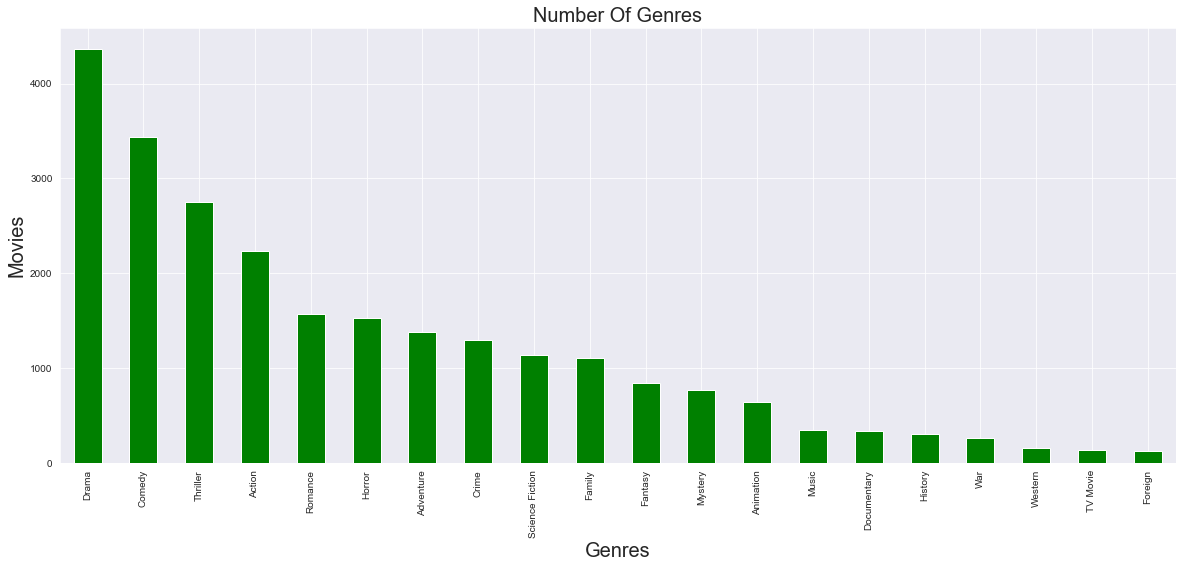

In [95]:
# Bar Plot display relationship between genre and number of movies
clean("genres").plot(kind="bar",color='green',figsize=(20,8));
# the title of the plot
plt.title('Number Of Genres',fontsize=20);
plt.ylabel('Movies',fontsize=20);
plt.xlabel('Genres',fontsize=20);

> So we can notice that **Drama** movies are Highest genre exceed 4000 movies over the years

### Is long movies have more Popularity ?

In [57]:
df['runtime'].mean()

102.74434019987763

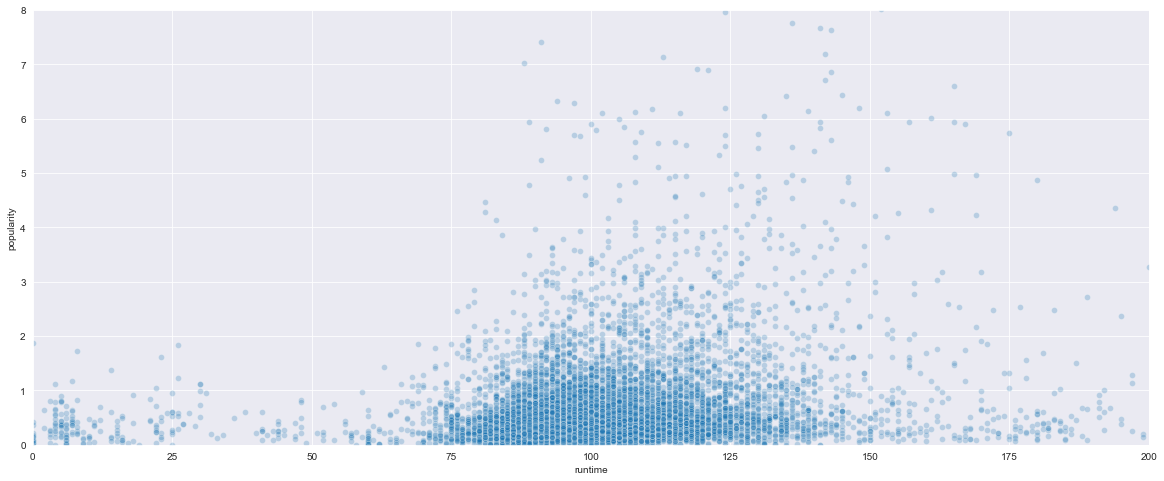

In [47]:
plt.figure(figsize=(20,8))
sns.scatterplot(x='runtime',y='popularity',data=df,alpha=0.25)
plt.xlim(0,200);
plt.ylim(0,8);

> Based on average runtime **102** the Movies that exceed the average have more popularity

### Is the Popularity and Rating of movies getting better, worse, or staying the same over time?

In [58]:
# Create a function to prevent repetitive code
# The function calculates the average variable of groupby
def calc_avg(var1,var2):
    avg_data = df.groupby(var1)[var2].mean()
    return avg_data

I used the function **calc_avg** created above to plot Popularity and Rating over time.

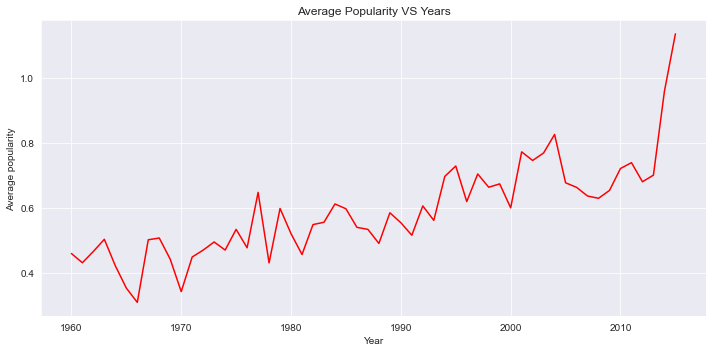

In [59]:
avg_rating_year = calc_avg("release_year","popularity") 
avg_rating_year.plot(kind='line',color='red',title='Average Popularity VS Years',figsize = (10,5))
plt.xlabel('Year') # set x-label name
plt.ylabel('Average popularity') # set y-label name
plt.tight_layout()

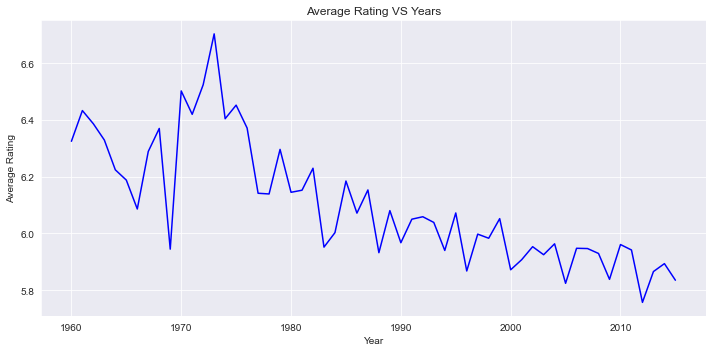

In [60]:
avg_rating_year = calc_avg("release_year","vote_average")

avg_rating_year.plot(kind='line',color='blue',title='Average Rating VS Years',figsize = (10,5))
plt.xlabel('Year') # set x-label name
plt.ylabel('Average Rating') # set y-label name
plt.tight_layout()

> **Conclusion:** The Rating decrease over years but popularity increase! \
Apparently, people are more inclined towards old classics

# Conclusion
---
Drama is the best genres for people so we have more Movies.\
People preferd Long movies than short movies 
> **Limitations:** 
+ The data we analyzed is a sample and maybe a few movies skewed the data in both popularity and rating over time 
+ budget and revenues have zero values and I fill them with average 
+ There missing values in the data dropped 
> 
> **Of course, this will affect our results**